# Lab 5

1. 提交作業之前，建議可以先點選上方工具列的**Kernel**，再選擇**Restart & Run All**，檢查一下是否程式跑起來都沒有問題，最後記得儲存。
2. 請先填上下方的姓名(name)及學號(stduent_id)再開始作答，例如：
```python
name = "我的名字"
student_id= "B06201000"
```
3. 演算法的實作可以參考[lab-5](https://yuanyuyuan.github.io/itcm/lab-5.html), 有任何問題歡迎找助教詢問。
4. **Deadline: 12/11(Wed.)**

In [173]:
name = "陳彥宇"
student_id = "B05303134"

---

# Exercise 1
---
### An $m \times m$ _Hilbert matrix_ $H_m$ has entries $h_{ij} = 1/(i+j-1)$ for $ 1 \leq i, j \leq m$, and so it has the form
### $$\left [
   \begin{matrix}
     1 & 1/2 & 1/3 & \dots \\
     1/2 & 1/3 & 1/4 & \dots \\
     1/3 & 1/4 & 1/5 & \dots \\
     \vdots      & \vdots      & \vdots & \ddots 
   \end{matrix}
  \right ].$$

In [174]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

## Part 1
### Generate the Hilbert matrix of order $m$, for $m=2,3,\ldots, 12$.
### For each $m$, compute the condition number of $H_{m}$,  _ie_ , in $p$-norm for $p=1$ and $2$, and make a plot of the results.

---
### Part 1.1 

Define the function of Hilbert matrix

In [175]:
def hilbert_matrix(m):
    '''
    Return:
        2D np.array, the Hildert Matrix of order m
    '''
    # ===== 請實做程式 =====
    li = [[] for _ in range(m)]
    for i in range(m):
        for j in range(m):
            ele=1/(i+j+1)
            li[i].append(ele)
    return np.array(li)
    # ====================

Test your function.

In [176]:
print('H_2:\n', hilbert_matrix(2))

H_2:
 [[1.         0.5       ]
 [0.5        0.33333333]]


---
### Part 1.2

Collect all Hilbert matrices into the list `H_m` for m = 2, 3, ..., 12.


In [177]:
H_m = []
# ===== 請實做程式 =====
for m in range(11):
    H_m.append(hilbert_matrix(m+2))
# ====================

Check your Hilbert matrix list.

In [178]:
for i in range(len(H_m)):
    print('H_%d:' % (i+2))
    print(H_m[i])
    print()

H_2:
[[1.         0.5       ]
 [0.5        0.33333333]]

H_3:
[[1.         0.5        0.33333333]
 [0.5        0.33333333 0.25      ]
 [0.33333333 0.25       0.2       ]]

H_4:
[[1.         0.5        0.33333333 0.25      ]
 [0.5        0.33333333 0.25       0.2       ]
 [0.33333333 0.25       0.2        0.16666667]
 [0.25       0.2        0.16666667 0.14285714]]

H_5:
[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]

H_6:
[[1.         0.5        0.33333333 0.25       0.2        0.16666667]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.33333333 0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.25       0.2        0.16666667 0.14285714 0.125      0.11111111]
 [0.2        0.16666667 0.14285714 0.125      0.1111111

---
### Part 1.3

Plot the condition number of $H_m$ for $m=2,3,\ldots, 12$

Collect all condition numbers in 1-norm of `H_m` into a list `one_norm`

In [179]:
one_norm = []
# ===== 請實做程式 =====
for i in range(len(H_m)):
    one_norm.append(sum(sum(H_m[i])))
# ====================

In [180]:
print('one_norm:\n', one_norm)

one_norm:
 [2.333333333333333, 3.6999999999999997, 5.076190476190476, 6.456349206349206, 7.8385281385281385, 9.221872571872572, 10.605949605949604, 11.990516836105071, 13.375428063508558, 14.760589917478464, 16.145939989027887]


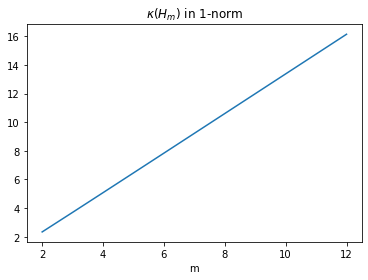

In [181]:
plt.plot(range(2,13), one_norm)
plt.xlabel('m')
plt.title(r'$\kappa(H_m)$ in 1-norm')
plt.show()

Collect all condition numbers in 2-norm of `H_m` into a list `two_norm`

In [182]:
two_norm = []
# ===== 請實做程式 =====
for i in range(len(H_m)):
    two_norm.append(LA.norm(H_m[i]))
# ====================

In [183]:
print('two_norm:\n', two_norm)

two_norm:
 [1.2692955176439846, 1.413624183909335, 1.5097340998183075, 1.5809062632720225, 1.63702239330239, 1.6831324888435926, 1.7221431395612752, 1.755871909716653, 1.7855271226510334, 1.8119508009081233, 1.8357520373814677]


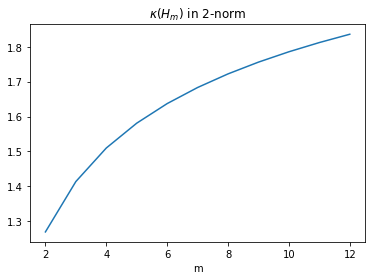

In [184]:
plt.plot(range(2,13), two_norm)
plt.xlabel('m')
plt.title(r'$\kappa(H_m)$ in 2-norm')
plt.show()

---
## Part 2 

### Now generate the $m$-vector $b_m = H_{m} x$ also, where $x$ is the $m$-vector with all of its components equal to $1$.

### Use Gaussian elimination to solve the resulting linear system $H_{m} x = b_m$ with $H_{m}$ and $b$ given above, obtaining an approximate solution $\tilde{x}$.

### Part 2.1

Construct the $m$-vector $b_m$ for $m = 2, 3, \dots, 12$. Store all 1D `np.array` $b_m$ into the list `b_m`.

In [185]:
'''
Hint:
    b_m = ?
'''
# ===== 請實做程式 =====
b_m = []
for m in range(11):
    x = np.ones(m+2)
    b_m.append(H_m[m] @ x)
# ====================

Print `b_m`

In [186]:
for i in range(len(b_m)):
    print('b_%d:' % (i+2))
    print(b_m[i])
    print()

b_2:
[1.5        0.83333333]

b_3:
[1.83333333 1.08333333 0.78333333]

b_4:
[2.08333333 1.28333333 0.95       0.75952381]

b_5:
[2.28333333 1.45       1.09285714 0.88452381 0.74563492]

b_6:
[2.45       1.59285714 1.21785714 0.99563492 0.84563492 0.73654401]

b_7:
[2.59285714 1.71785714 1.32896825 1.09563492 0.93654401 0.81987734
 0.73013376]

b_8:
[2.71785714 1.82896825 1.42896825 1.18654401 1.01987734 0.89680042
 0.80156233 0.72537185]

b_9:
[2.82896825 1.92896825 1.51987734 1.26987734 1.09680042 0.96822899
 0.86822899 0.78787185 0.72169538]

b_10:
[2.92896825 2.01987734 1.60321068 1.34680042 1.16822899 1.03489566
 0.93072899 0.84669538 0.77725094 0.7187714 ]

b_11:
[3.01987734 2.10321068 1.68013376 1.41822899 1.23489566 1.09739566
 0.98955252 0.90225094 0.82988251 0.7687714  0.71639045]

b_12:
[3.10321068 2.18013376 1.75156233 1.48489566 1.29739566 1.15621919
 1.04510808 0.95488251 0.87988251 0.81639045 0.761845   0.71441417]



### Part 2.2

Implement the function of __Gaussian elimination__. 

(Note that you need to implement it by hand, simply using some package functions is not allowed.)

In [187]:
def gaussian_elimination(
    A,
    b
):
    '''
    Arguments:
        A : 2D np.array
        b : 1D np.array

    Return:
        x : 1D np.array, solution to Ax=b
    '''
    
    # ===== 請實做程式 =====
    A = np.column_stack((A,b))
    n = len(A)

    for i in range(0, n):
        # Search for maximum in this column
        maxEl = abs(A[i][i])
        maxRow = i
        for k in range(i+1, n):
            if abs(A[k][i]) > maxEl:
                maxEl = abs(A[k][i])
                maxRow = k

        # Swap maximum row with current row (column by column)
        for k in range(i, n+1):
            tmp = A[maxRow][k]
            A[maxRow][k] = A[i][k]
            A[i][k] = tmp

        # Make all rows below this one 0 in current column
        for k in range(i+1, n):
            c = -A[k][i]/A[i][i]
            for j in range(i, n+1):
                if i == j:
                    A[k][j] = 0
                else:
                    A[k][j] += c * A[i][j]

    # Solve equation Ax=b for an upper triangular matrix A
    x = [0 for i in range(n)]
    for i in range(n-1, -1, -1):
        x[i] = A[i][n]/A[i][i]
        for k in range(i-1, -1, -1):
            A[k][n] -= A[k][i] * x[i]
    return x
    # ====================

Store all approximate solutions $\tilde{x}$ of $H_m$ into a list `x_m` for $m = 2, 3, \dots, 12$

In [188]:
x_m = []
for i in range(len(H_m)):
    x = gaussian_elimination(H_m[i], b_m[i])
    x_m.append(x)

---
## Part 3

### Investigate the error behavior of the computed solution $\tilde x$.
### (i) Compute the $\infty$-norm of the residual $r = b-H_{m} \tilde{x}$.
### (ii) Compute the error $\delta x = \tilde{x}-x$, where $x$ is the vector of all ones. 
### (iii) How large can you take $m$ before there is no significant digits in the solution ?

### Part 3.1

Compute the $\infty$-norm of the residual $r_m = b_m-H_{m} \tilde{x}$ for $m = 2, 3, \dots, 12$. And store the values into the list `r_m`.

In [189]:
r_m = []
# ===== 請實做程式 =====
for i in range(len(b_m)):
    r_m.append(LA.norm(b_m[i]-H_m[i] @ x_m[i],np.inf))
# ====================

In [190]:
print('r_m:\n', r_m)

r_m:
 [0.0, 0.0, 1.1102230246251565e-16, 1.1102230246251565e-16, 4.440892098500626e-16, 1.1102230246251565e-16, 2.220446049250313e-16, 4.440892098500626e-16, 8.881784197001252e-16, 4.440892098500626e-16, 4.440892098500626e-16]


Plot the figure of the $\infty$-norm of the residual for $m = 2, 3, \dots, 12$

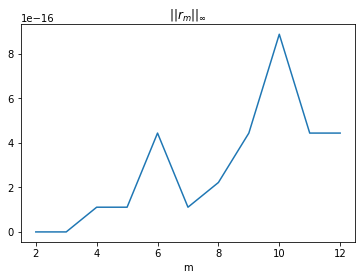

In [191]:
plt.plot(range(2,13), r_m)
plt.xlabel('m')
plt.title(r'$||r_m||_\infty$')
plt.show()

### Part 3.2

Compute the error $\delta x = \tilde{x}-x$, where $x$ is the vector of all ones. And store the values into the list `delta_x`.

In [192]:
delta_x = []
# ===== 請實做程式 =====
for i in range(len(x_m)):
    delta_x.append(x_m[i]-np.ones(i+2))
# ====================

Collect all errors $\delta x$ in 2-norm into the list `delta_x_two_norm` for $m = 2, 3, ..., 12$

In [193]:
delta_x_two_norm = []
# ===== 請實做程式 =====
for i in range(len(delta_x)):
    delta_x_two_norm.append(LA.norm(delta_x[i]))
# ====================

In [194]:
print('delta_x_two_norm =', delta_x_two_norm)

delta_x_two_norm = [8.005932084973442e-16, 1.389554002205336e-14, 7.723575500503776e-13, 7.811445018889777e-13, 6.86916138612034e-10, 3.69874646466738e-08, 3.510636970135817e-07, 4.547114635580286e-05, 0.0012391114999285313, 0.02199754581318143, 1.8870469809415675]


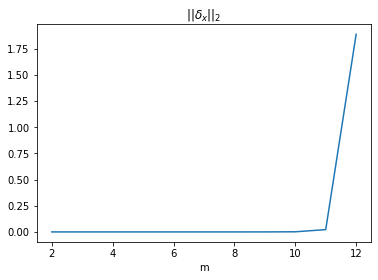

In [195]:
plt.plot(range(2,13), delta_x_two_norm)
plt.xlabel('m')
plt.title(r'$||\delta_x||_2$')
plt.show()

### Part 3.3

How large can you take  $m$  before there is no significant digits in the solution ?

From the previous cell of delta_x_two_norm, we take $0.0001$ as the tolariance. The corresponding maximum of $m$ is thus followed by the following cell.

In [202]:
# Take the error as 0.0001
for m in range(len(delta_x_two_norm)):
    if delta_x_two_norm[m] >= 0.0001:
        print('The largest m such that there is no significant digits in the solution is ', m+2, '.')
        break

The largest m such that there is no significant digits in the solution is  10 .
